In [1]:
import sys
code_path = "/mnt/code/users/xuziyang/PromptBias/code"
sys.path.append(code_path)

In [2]:
from truely_know import Experiment

exp = Experiment()
output_dir = "/mnt/code/users/xuziyang/PromptBias/output"
exp.set_model("bert","bert-base-cased")
# exp.relations = ["P413"]
exp.set_common_vocab(exp.work_dir + "/common_vocabs/common_vocab_cased.txt")

/usr/local/lib/miniconda3/envs/xzy_BiasBench/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/miniconda3/envs/xzy_BiasBench/lib/python3.8/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForS

In [ ]:
results = {}
all_acc, avg_acc = exp.experiment_prompt_only_accuracy(prompt="LAMA")
results["LAMA"] = {"avg_acc": avg_acc, "all_acc": all_acc}

all_acc, avg_acc = exp.experiment_prompt_only_accuracy(prompt="LPAQA")
results["LPAQA"] = {"avg_acc": avg_acc, "all_acc": all_acc}

all_acc, avg_acc = exp.experiment_prompt_only_accuracy(prompt="AutoPrompt")
results["AutoPrompt"] = {"avg_acc": avg_acc, "all_acc": all_acc}

all_acc, avg_acc = exp.experiment_prompt_only_accuracy(prompt="OptiPrompt")
results["OptiPrompt"] = {"avg_acc": avg_acc, "all_acc": all_acc}


# all_acc, avg_acc = exp.experiment_prompt_only_accuracy(manual_prompt="LAMA")
# results["LAMA"] = {"avg_acc": avg_acc, "all_acc": all_acc}

In [12]:
from matplotlib import pyplot as plt
import numpy as np


def draw_prompt_only_acc(all_acc):
    show_num=10
    legend_size =  16
    x_label_size = 20
    y_label_size = 20
    x_ticks = 14
    y_ticks = 15
    width=0.3


    part_xlabels = [list(item.keys())[0] for item in all_acc["LAMA"]["P"]]
    x = np.arange(len(part_xlabels))
    y = [list(item.values())[0] for item in all_acc["LAMA"]["P"]]

    fig2,axs2 = plt.subplots(1,1,figsize=(30,5))
    axs2.bar(x, y, width=0.4, edgecolor="black", color="#FFBE7A", label="LAMA")
    axs2.set_ylabel("Majority Class Ratio",fontsize=y_label_size,)
    axs2.set_xticks(np.array(range(len(part_xlabels))))
    _ = axs2.set_xticklabels(part_xlabels,rotation=20, fontsize=x_ticks)
    axs2.set_ylim(top=0.8)
    axs2.legend(fontsize=legend_size)

    part_xlabels = [list(item.keys())[0] for item in all_acc["WIKI-UNI"]["P"]]
    x = np.arange(len(part_xlabels))
    y = [list(item.values())[0] for item in all_acc["WIKI-UNI"]["P"]]

    fig3,axs3 = plt.subplots(1,1,figsize=(30,5))
    axs3.bar(x, y, width=0.4, edgecolor="black", color="#FFBE7A", label="WIKI-UNI")
    axs3.set_ylabel("Majority Class Ratio",fontsize=y_label_size,)
    axs3.set_xticks(np.array(range(len(part_xlabels))))
    _ = axs3.set_xticklabels(part_xlabels,rotation=20, fontsize=x_ticks)
    axs3.set_ylim(top=0.8)
    axs3.legend(fontsize=legend_size)

LAMA Manual Prompts
{'LAMA': 0.052293896748871325, 'WIKI-UNI': 0.010511495324015867, 'LAMA-WHU': 0.04870203600686854}


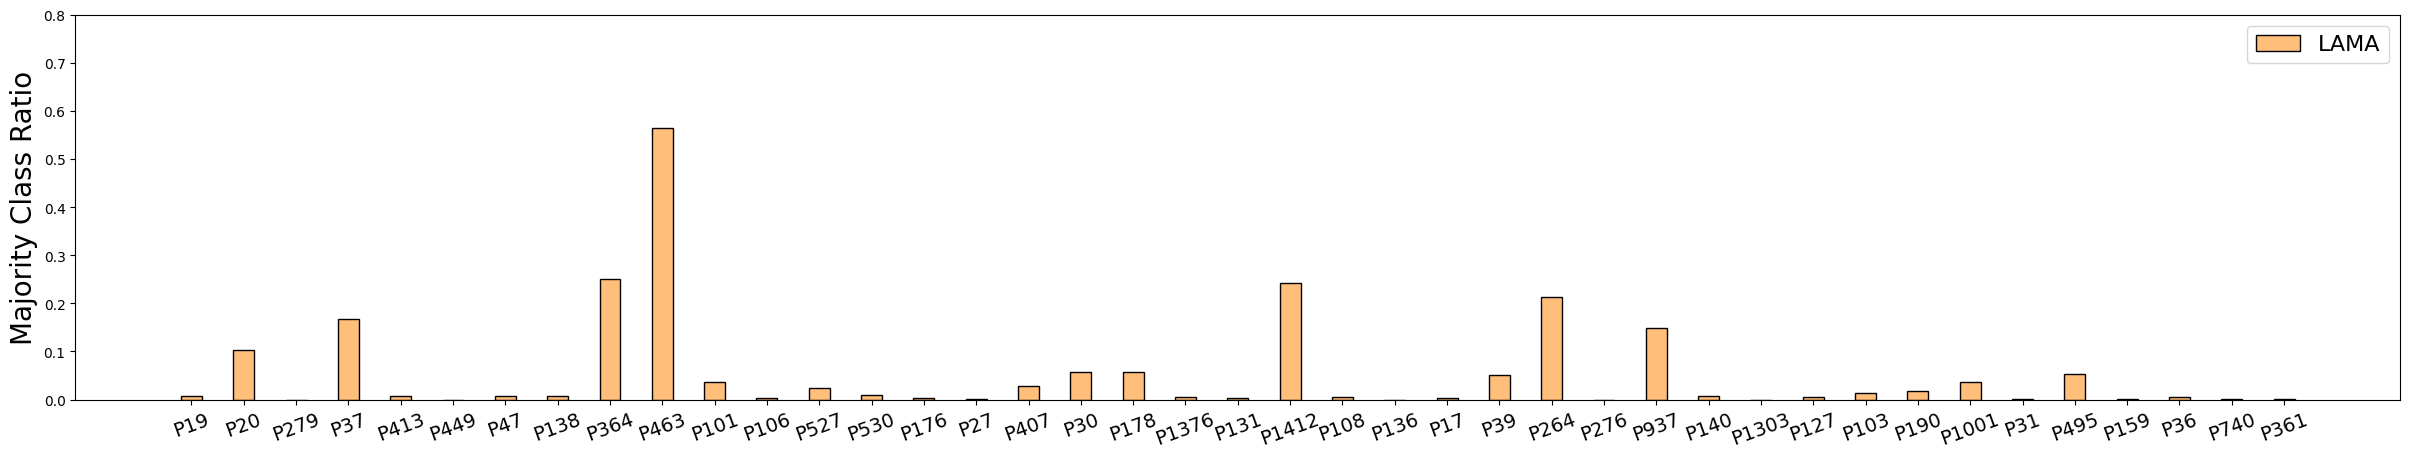

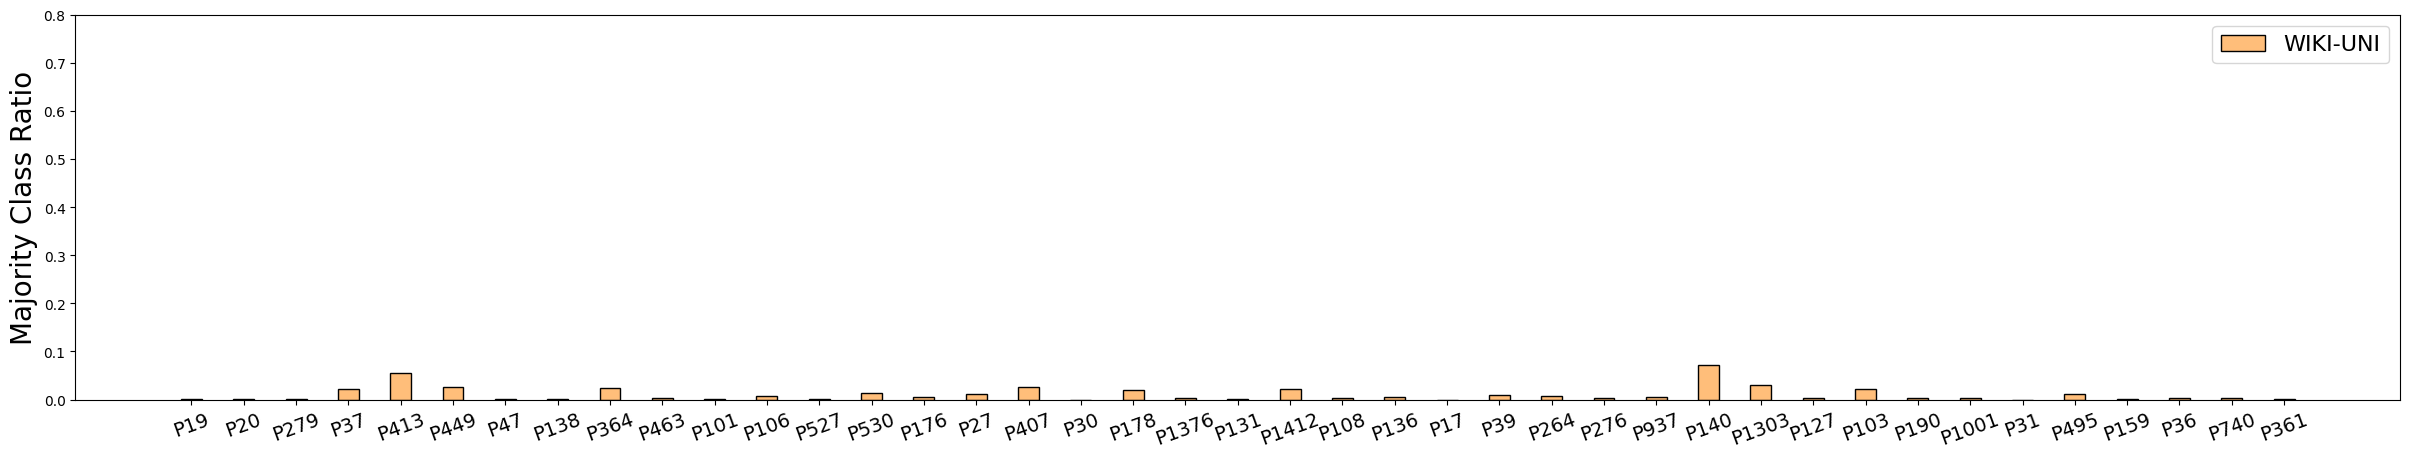

In [13]:
LAMA_results = results["LAMA"]
LPAQA_results = results["LPAQA"]
AutoPrompt_results = results["AutoPrompt"]
OptiPrompt_results = results["OptiPrompt"]

print("LAMA Manual Prompts")
print(LAMA_results["avg_acc"])
draw_prompt_only_acc(LAMA_results["all_acc"])
# LAMA_all_acc

LPAQA Manual Prompts
{'LAMA': 0.06355538112649453, 'WIKI-UNI': 0.01696235773132163, 'LAMA-WHU': 0.058899603783447135}


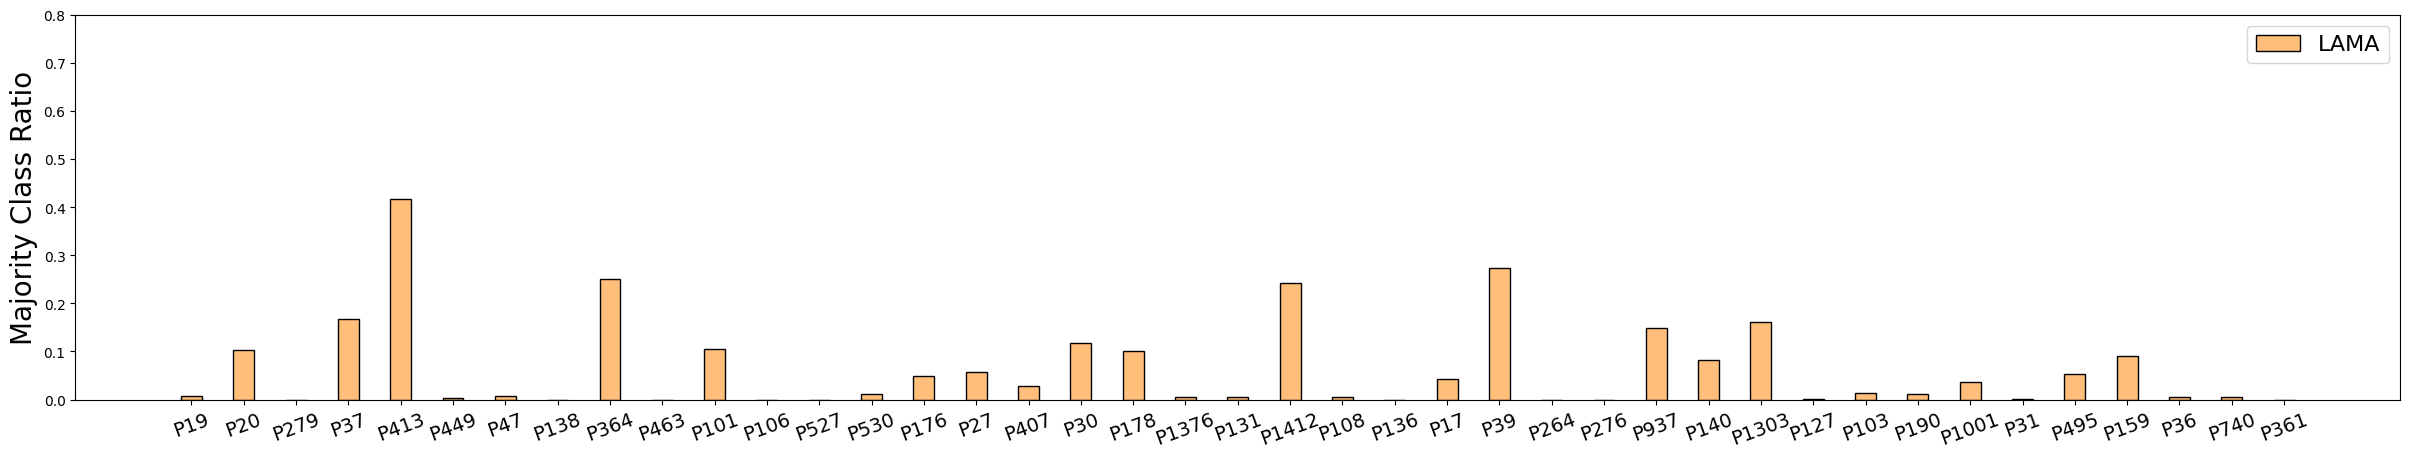

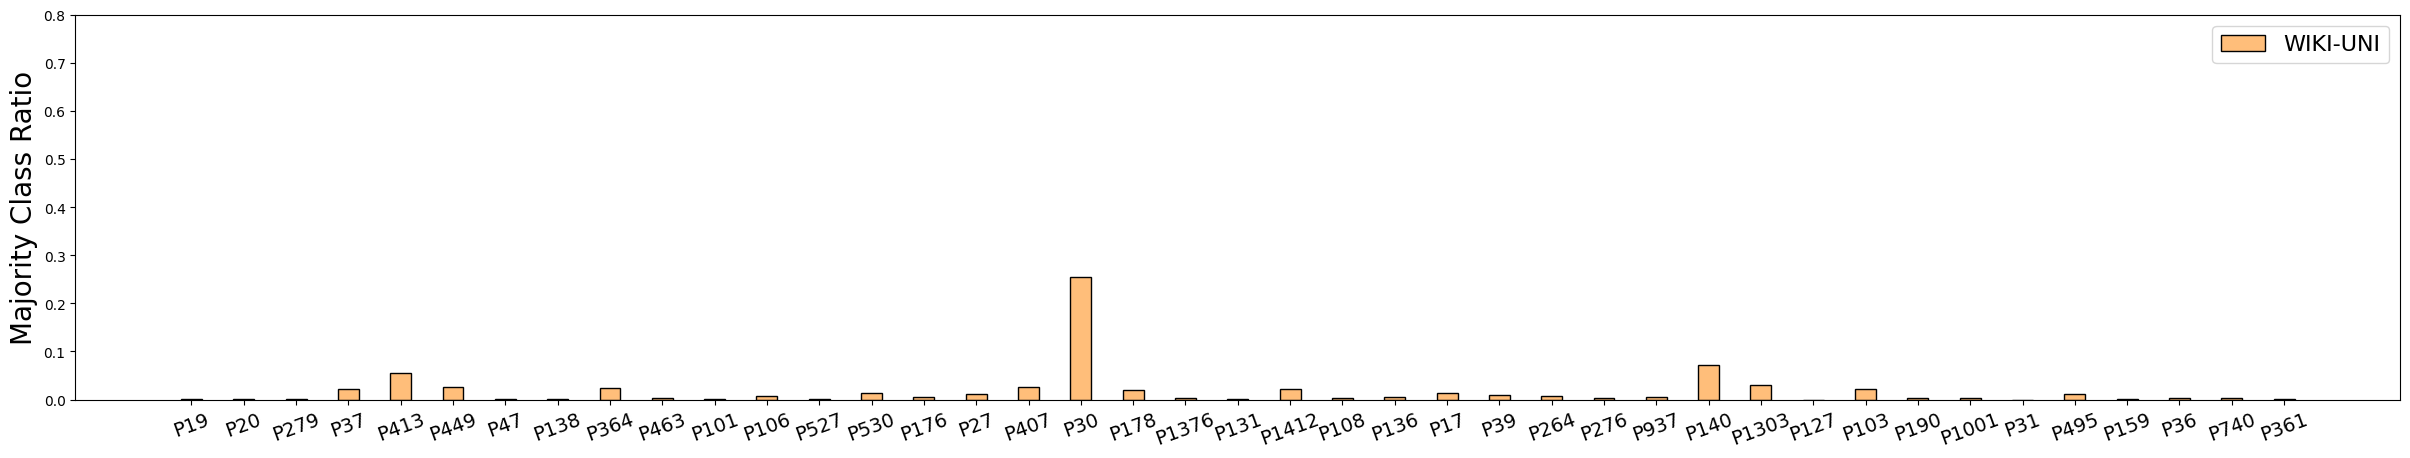

In [14]:
print("LPAQA Manual Prompts")
print(LPAQA_results["avg_acc"])
draw_prompt_only_acc(LPAQA_results["all_acc"])

AutoPrompt Manual Prompts
{'LAMA': 0.1351717267010112, 'WIKI-UNI': 0.017091566572334294, 'LAMA-WHU': 0.13159595597312493}


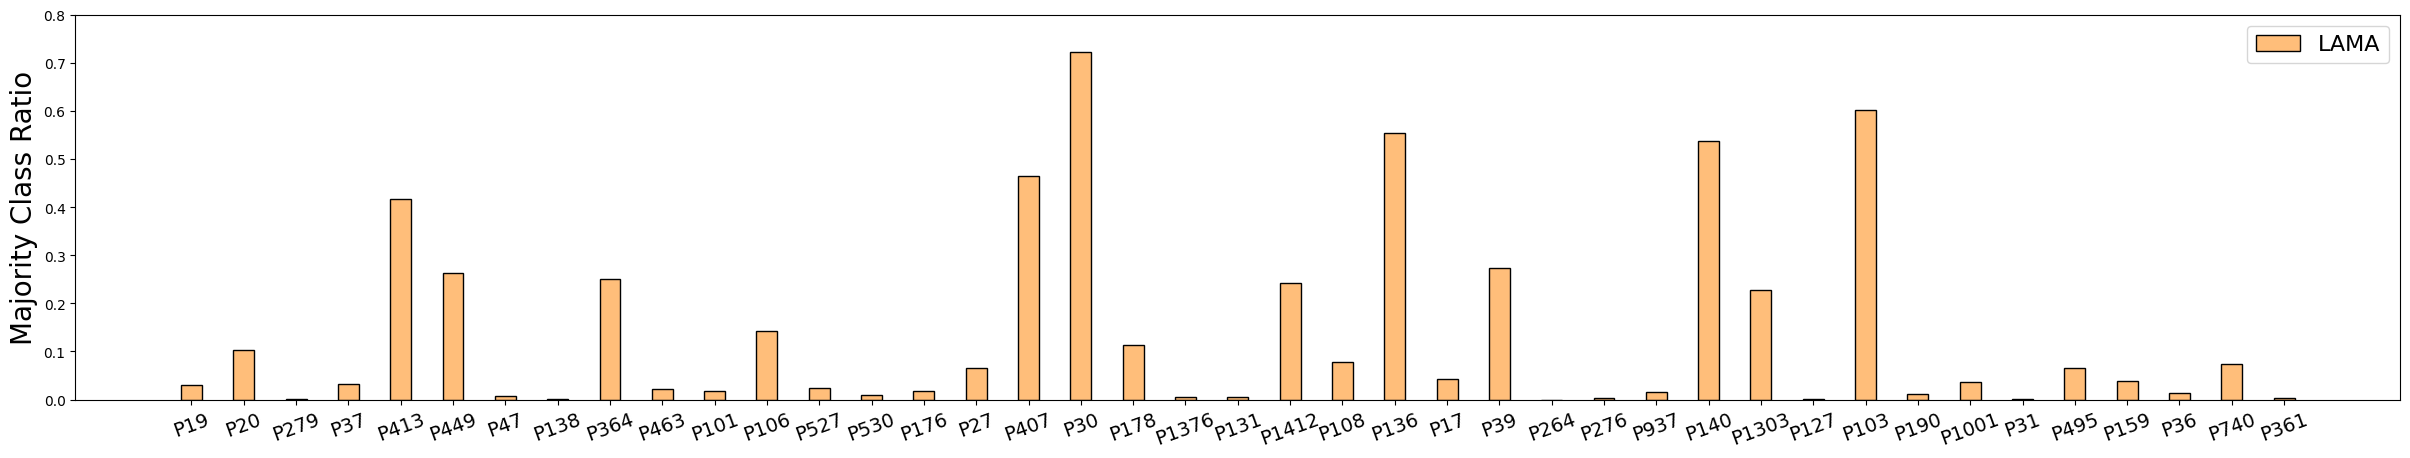

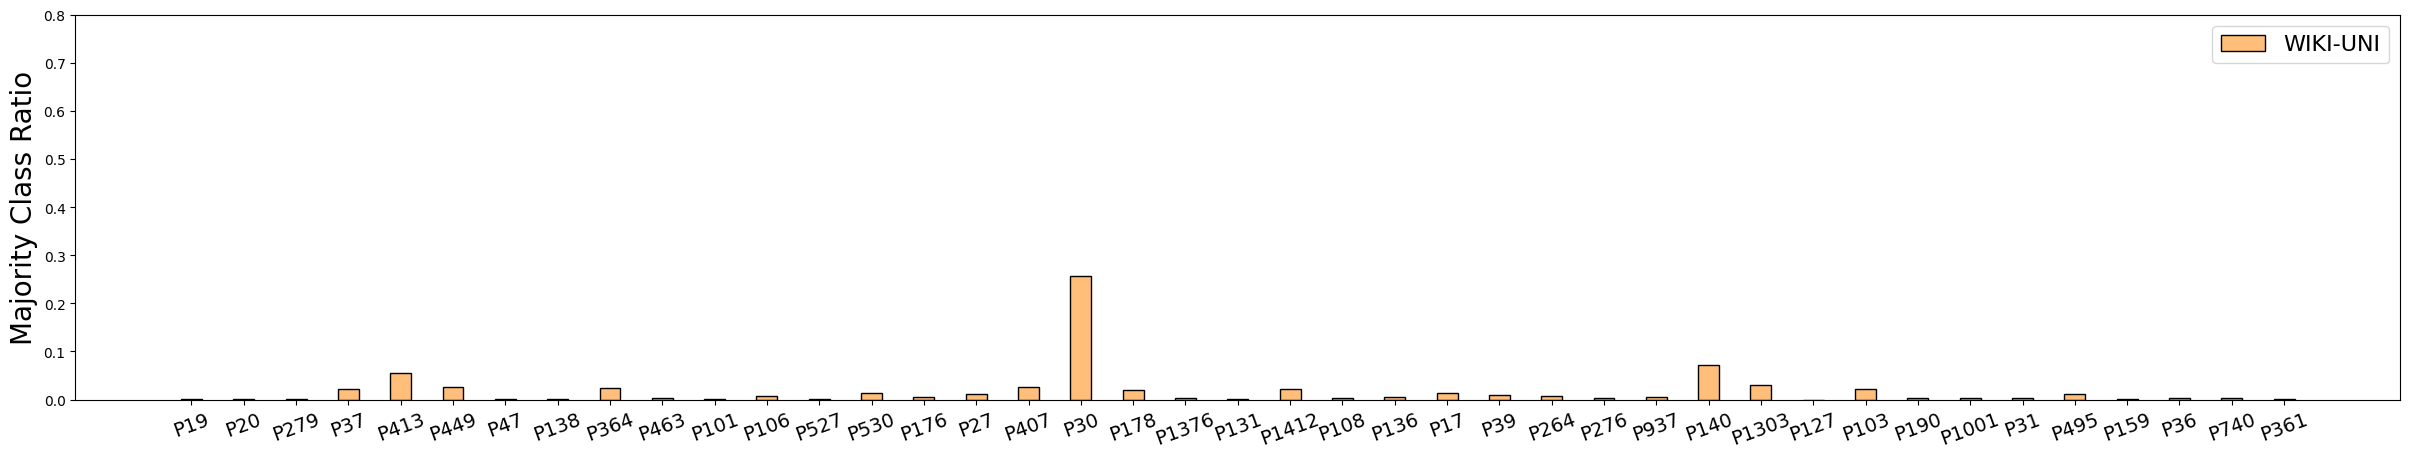

In [15]:
print("AutoPrompt Manual Prompts")
print(AutoPrompt_results["avg_acc"])
draw_prompt_only_acc(AutoPrompt_results["all_acc"])

OptiPrompt Manual Prompts
{'LAMA': 0.16469714592203746, 'WIKI-UNI': 0.01717619825890742, 'LAMA-WHU': 0.17550527676890684}


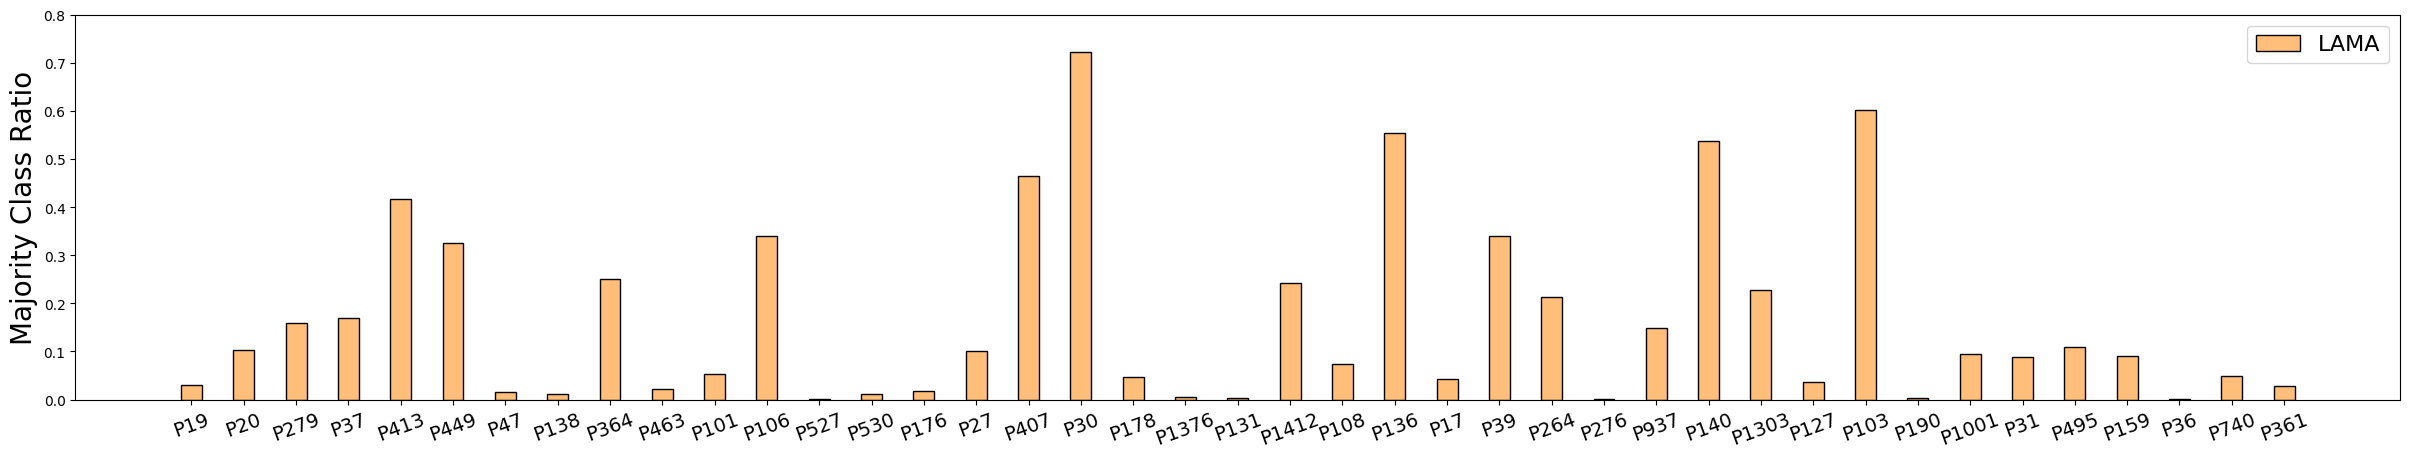

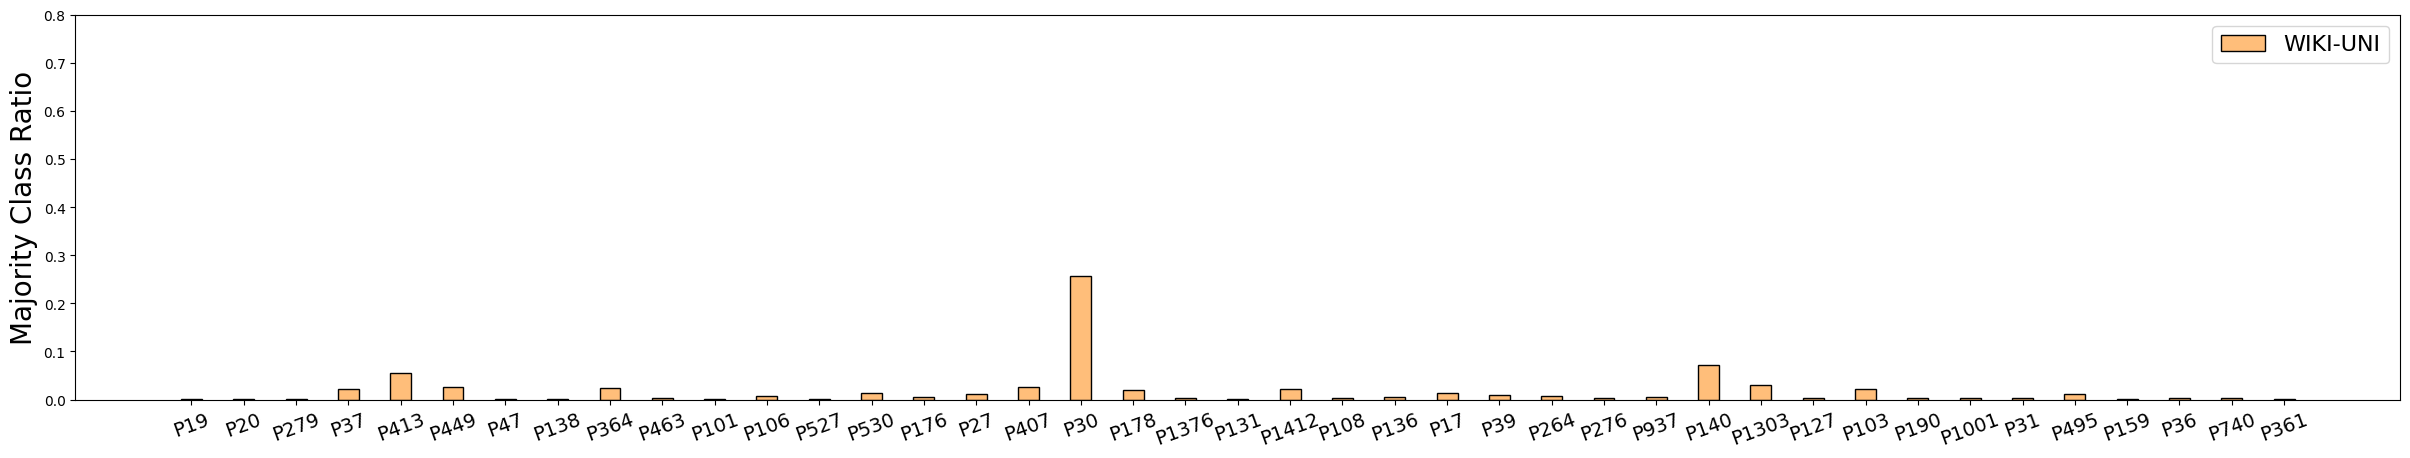

In [13]:
print("OptiPrompt Manual Prompts")
print(OptiPrompt_results["avg_acc"])
draw_prompt_only_acc(OptiPrompt_results["all_acc"])

### 验证do sample是否有意义

In [ ]:
# exp.relations = ["P463"]
all_acc, avg_acc = exp.experiment_prompt_only_accuracy(manual_prompt="AutoPrompt", do_sample=True)
print(all_acc)


In [7]:
import torch
path = "/mnt/code/users/xuziyang/PromptBias/code/analysis/prompt_only_acc.pt"
# torch.save(results, path)
temp = torch.load(path)

In [15]:
from prettytable import PrettyTable
table = PrettyTable()
table.title = "Prompt-only-query accuracy for Bert-base-cased "
table.field_names = ["Prompts", "LAMA", "WIKI-UNI", "LAMA-UHN"]
for prompt in ["LAMA","LPAQA","AutoPrompt","OptiPrompt"]:
    table.add_row([prompt, *[round(100*item, 2)  for item in list(results[prompt]["avg_acc"].values())]]  )

print(table)

+-------------------------------------------------+
| Prompt-only-query accuracy for Bert-base-cased  |
+--------------+--------+-----------+-------------+
|   Prompts    |  LAMA  |  WIKI-UNI |   LAMA-UHN  |
+--------------+--------+-----------+-------------+
|     LAMA     |  5.23  |    1.05   |     4.87    |
|    LPAQA     |  6.36  |    1.7    |     5.89    |
|  AutoPrompt  | 13.52  |    1.71   |    13.16    |
|  OptiPrompt  | 16.47  |    1.72   |    17.55    |
+--------------+--------+-----------+-------------+
